# Just Different Witness

In [1]:
# Preamble to always run
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import eleganttool
import subprocess
from matplotlib import rc
import os 
import sys
import h5py
import scipy.constants as sc
from IPython.display import Markdown
from opal import load_dataset
import opal
from scipy.optimize import curve_fit

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3
cms = sc.c

FontSize=16  
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

In [2]:
# plotting emittance and rms size output from opal cathode to yag 4
base = '/lstr/sahara/aard/cphillips/'
charge = base + '1nC/2beam/1cath2y4/witness/squa/test_dist_behind/'

tss = np.arange(0,16)
tss = [charge+'ts'+str(i)+'/' for i in tss]
#tss = [base+'1nC/2beam/1cath2y4/witness/squa/3p8behind/']+tss
print(tss)
#tss = tss[:4]
drive_avg_z = 11.58790463959388 # m


['/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts0/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts1/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts2/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts3/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts4/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts5/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts6/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts7/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts8/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts9/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts10/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/te

In [3]:
dists_behind = []
for i in tss:
#    filename = i+'input.stat'
    h5file = i+'YAG4.h5'

#    ds = load_dataset('./', fname = filename)
#print(ds)

#    s = ds.getData('s') # path length
    h5dat = h5py.File(h5file,'r')
    print(h5dat.keys())
    lts = h5dat['Step#0']
    print(lts.keys())
#xs = lts['x'][:]
#ys = lts['y'][:]
#    zs = lts['z'][:]
#px = lts['px'][:]
#py = lts['py'][:]
#pz = lts['pz'][:]
#px = px/pz
#py = py/pz
    ts = lts['time'][:]

    z_parts = ts*cms
    zmean = np.mean(z_parts)
    dibehind = (drive_avg_z-zmean)*mm
    print('Drive Avg Z: ',drive_avg_z,' m')
    print('Witness Avg Z: ',zmean,' m')
    print('Distance Behind: ',dibehind,' mm')
    dists_behind.append(dibehind)



    

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/witness/squa/test_dist_behind/ts0/YAG4.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

A:  0.16271565481346026
B:  1.0754318841523902
C:  0.6302263976539412


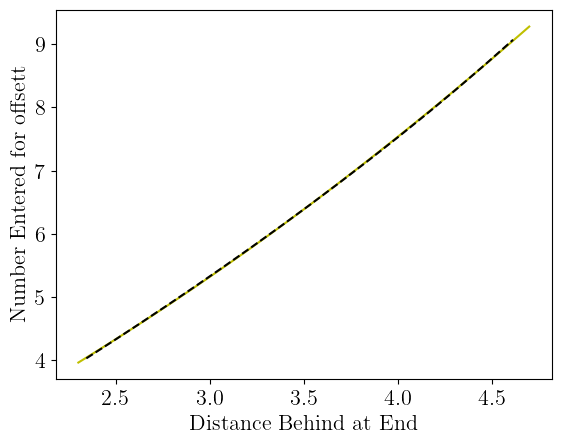

In [20]:
num_entered = [4.031,4.304,4.586,4.878,5.178,5.487,5.805,6.132,6.468,6.813,7.166,7.529,7.901,8.282,8.671,9.070] # mm

def curve2(x,A,B,C):
    return A*x**2 + B*x + C

popt, pcov = curve_fit(curve2, dists_behind, num_entered) 
print('A: ',popt[0])
print('B: ',popt[1])
print('C: ',popt[2])

xss = np.arange(2.3,4.7,0.1)

plt.plot(xss,curve2(xss,popt[0],popt[1],popt[2]),'y')
plt.plot(dists_behind,num_entered,'k--')
plt.xlabel('Distance Behind at End')
plt.ylabel('Number Entered for offsett')
plt.show()

In [11]:
desired_dist = 3.8 # distance behind drive bunch in mm

print('To have a distance behind of ',desired_dist,' mm, input ',curve2(desired_dist,popt[0],popt[1],popt[2]),'e-3/CLIGHT')

To have a distance behind of  3.8  mm, input  7.06648161293939 e-3/CLIGHT


# Centered around optimum

In [1]:
# Preamble to always run
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import eleganttool
import subprocess
from matplotlib import rc
import os 
import sys
import h5py
import scipy.constants as sc
from IPython.display import Markdown
from opal import load_dataset
import opal
from scipy.optimize import curve_fit

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3
cms = sc.c

FontSize=16  
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

In [16]:
# plotting emittance and rms size output from opal cathode to yag 4
base = '/lstr/sahara/aard/cphillips/'
charge = base + '1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/'


dtss = np.arange(0,16)
dtss = [charge+'drive/ts'+str(i)+'/' for i in dtss]
#tss = [base+'1nC/2beam/1cath2y4/witness/squa/3p8behind/']+tss
print(dtss)

wtss = np.arange(0,16)
wtss = [charge+'witness/ts'+str(i)+'/' for i in wtss]
#tss = [base+'1nC/2beam/1cath2y4/witness/squa/3p8behind/']+tss
print(wtss)



['/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts0/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts1/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts2/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts3/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts4/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts5/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts6/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts7/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts8/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts9/', '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/test_dist_behind/drive/ts10/

In [17]:
dists_behind = []
for i in np.arange(len(dtss)):
    dh5file = dtss[i]+'YAG4.h5'
    wh5file = wtss[i]+'YAG4.h5'

    dh5dat = h5py.File(dh5file,'r')
    print(dh5dat.keys())
    dlts = dh5dat['Step#0']
    print(dlts.keys())
    dts = dlts['time'][:]

    dz_parts = dts*cms
    dzmean = np.mean(dz_parts)

    wh5dat = h5py.File(wh5file,'r')
#    print(wh5dat.keys())
    wlts = wh5dat['Step#0']
    print(wlts.keys())
    wts = wlts['time'][:]

    wz_parts = wts*cms
    wzmean = np.mean(wz_parts)

    dibehind = (dzmean-wzmean)*mm
    print('Drive Avg Z: ',dzmean,' m')
    print('Witness Avg Z: ',wzmean,' m')
    print('Distance Behind: ',dibehind,' mm')
    dists_behind.append(dibehind)



    

<KeysViewHDF5 ['Step#0']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
Drive Avg Z:  11.588553674068857  m
Witness Avg Z:  11.58728218454247  m
Distance Behind:  1.27148952638656  mm
<KeysViewHDF5 ['Step#0']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
Drive Avg Z:  11.58862002584965  m
Witness Avg Z:  11.587221414838151  m
Distance Behind:  1.3986110114991845  mm
<KeysViewHDF5 ['Step#0']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
Drive Avg Z:  11.588686639599544  m
Witness Avg Z:  11.587160915099023  m
Distance Behind:  1.5257245005209086  mm
<KeysViewHDF5 ['Step#0']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 

16
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
A:  0.0006158097344000748
B:  1.5715018018733815
C:  0.0008797230427572083


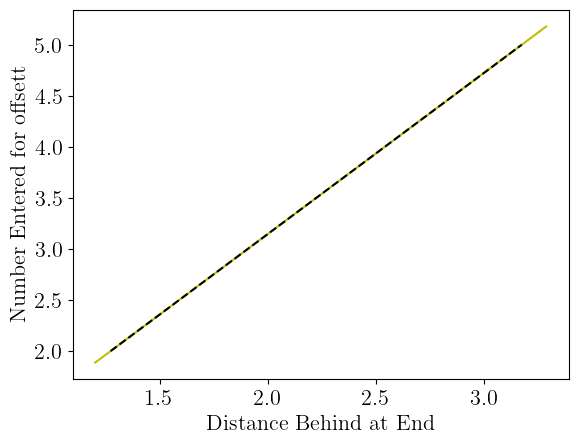

In [18]:
num_entered = np.arange(2,5.2,.2) #[4.031,4.304,4.586,4.878,5.178,5.487,5.805,6.132,6.468,6.813,7.166,7.529,7.901,8.282,8.671,9.070] # mm
print(len(num_entered))
print(np.arange(len(dtss)))
def curve2(x,A,B,C):
    return A*x**2 + B*x + C

popt, pcov = curve_fit(curve2, dists_behind, num_entered) 
print('A: ',popt[0])
print('B: ',popt[1])
print('C: ',popt[2])

xss = np.arange(1.2,3.3,0.01)

plt.plot(xss,curve2(xss,popt[0],popt[1],popt[2]),'y')
plt.plot(dists_behind,num_entered,'k--')
plt.xlabel('Distance Behind at End')
plt.ylabel('Number Entered for offsett')
plt.show()

In [19]:
def curve2(x,A,B,C):
    return A*x**2 + B*x + C
A = 0.0006158097344000748
B = 1.5715018018733815
C = 0.0008797230427572083
desired_dist = 6.0525 # distance behind drive bunch in mm
#desired_dist = 3.8
print('To have a distance behind of ',desired_dist,' mm, input ',curve2(desired_dist,A, B, C),'e-3/CLIGHT')

To have a distance behind of  6.0525  mm, input  9.534953186778054 e-3/CLIGHT


In [20]:
print(9.534953186778054e-3/cms)

3.180518032504358e-11


In [1]:
# Preamble to always run
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import eleganttool
import subprocess
from matplotlib import rc
import os 
import sys
import h5py
import scipy.constants as sc
from IPython.display import Markdown
from opal import load_dataset
import opal
from scipy.optimize import curve_fit

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3
cms = sc.c

FontSize=16  
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

def search_line_in_file(file_path, search_string):
    with open(file_path, 'r') as file:
        for line in file:
            if search_string in line:
                return line
    return None

In [3]:
nsteps = 44

rffreq = 1.3e9
rfsec = 1/rffreq
tstart = 0-rfsec/2 #zstart/cms
tend = 2*rfsec+rfsec/2 #zend/cms
print(rfsec)
print(tstart, tend)
print(tend-tstart)


ztot = tend*cms*1e3


nums = np.arange(nsteps)

dirnames = ['/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/timescan/'+str(nsteps)+'steps/tstep_'+str(i)+'/' for i in nums]
fnames = [dirnames[i]+'input.stat' for i in nums]
innames = [dirnames[i]+'input.in' for i in nums]



7.692307692307692e-10
-3.846153846153846e-10 1.923076923076923e-09
2.3076923076923076e-09


In [4]:
allenergies = []
allnparts = []
offset = []
allrmsx = []
allrmsy = []
allrmsz = []
for i in np.arange(len(fnames)):
    ds = load_dataset('./',fname = fnames[i])
    rmsx = ds.getData('rms_x') # m
    rmsy = ds.getData('rms_y')
    rmss = ds.getData('rms_s')
    rmsps = ds.getData('rms_ps')
    emitx = ds.getData('emit_x') # normalized emittance x
    emity = ds.getData('emit_y') # m
    emits = ds.getData('emit_s')
    kene = ds.getData('energy')
    nparts = ds.getData('numParticles')

#    print('Data for Full Sim Information: ')
    print('x rms = ', rmsx[-1])
#    print('y rms = ', rmsy[-1])
#    print('s rms = ', rmss[-1])
#    print('ps rms = ', rmsps[-1])
#    print('emit x = ', emitx[-1])
#    print('emit y = ', emity[-1])
#    print('emit s = ', emits[-1])
#    print('energy = ', kene[-1])
#    print('Num parts = ', nparts[-1])

    line = search_line_in_file(innames[i],'OFFSETT')
    actualoffset = float(line[18:-2])
    offset.append(actualoffset)
    allenergies.append(kene[-1])
    allnparts.append(nparts[-1])
    allrmsx.append(rmsx[-1])
    allrmsy.append(rmsy[-1])
    allrmsz.append(rmss[-1])
#print(offset)

x rms =  0.0006643756842720696
x rms =  0.0006633711425344959
x rms =  0.0006631089381837607
x rms =  0.0006634983424315338
x rms =  0.0006644598739557002
x rms =  0.0006659281334033012
x rms =  0.0006678504774979781
x rms =  0.0006701676516088157
x rms =  0.0006728313820988764
x rms =  0.0006758105417313157
x rms =  0.0006791155866537278
x rms =  0.0006827698336650259
x rms =  0.0006868161399668491
x rms =  0.0006910998472697996
x rms =  0.0006960630753778561
x rms =  0.0007015639233659361
x rms =  0.0007076550069257228
x rms =  0.0007143483783841056
x rms =  0.0007216793744249778
x rms =  0.0007297085936928229
x rms =  0.0007385637006625794
x rms =  0.0007483451121018429
x rms =  0.0007591878276130857
x rms =  0.0007712169630925673
x rms =  0.000784397267294241
x rms =  0.0007990170004698456
x rms =  0.0008150373746192505
x rms =  0.0008325948982415766
x rms =  0.0008519007499353164
x rms =  0.000873175667895376
x rms =  0.0008966128767134728
x rms =  0.0009221956400307948
x rms =  0

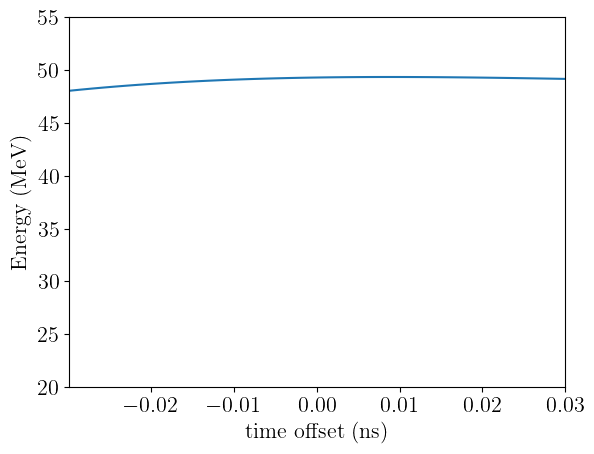

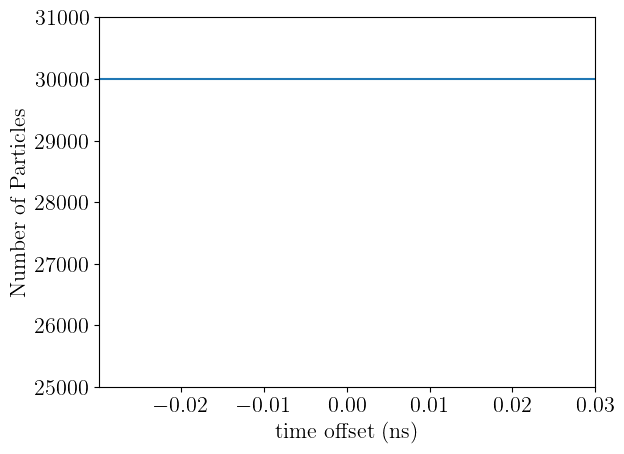

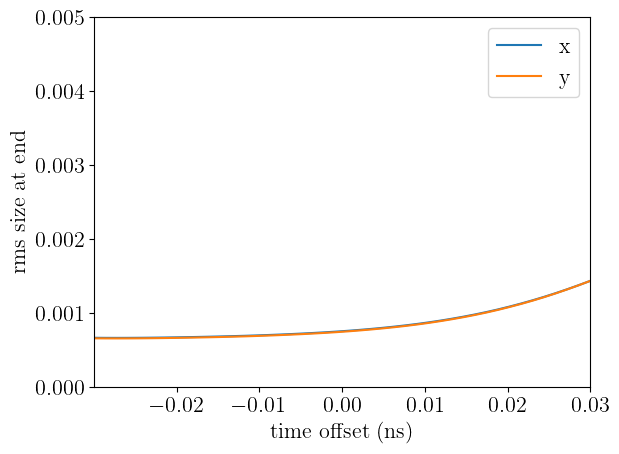

In [5]:

offsetns = [offset[i]*1e9 for i in np.arange(len(offset))]
xmin = -0.1
xmax = .4
xmin = offsetns[0]
xmax = offsetns[-1]
plt.plot(offsetns,allenergies)
plt.xlabel('time offset (ns)')
plt.ylabel('Energy (MeV)')
plt.xlim([xmin,xmax])
plt.ylim([20,55])
plt.show()
plt.plot(offsetns,allnparts)
plt.xlabel('time offset (ns)')
plt.ylabel('Number of Particles')
plt.xlim([xmin,xmax])
plt.ylim([25000,31000])
plt.show()
plt.plot(offsetns,allrmsx,label='x')
plt.plot(offsetns,allrmsy,label='y')
plt.xlabel('time offset (ns)')
plt.ylabel('rms size at end')
plt.xlim([xmin,xmax])
plt.ylim([0,.005])
plt.legend()
plt.show()

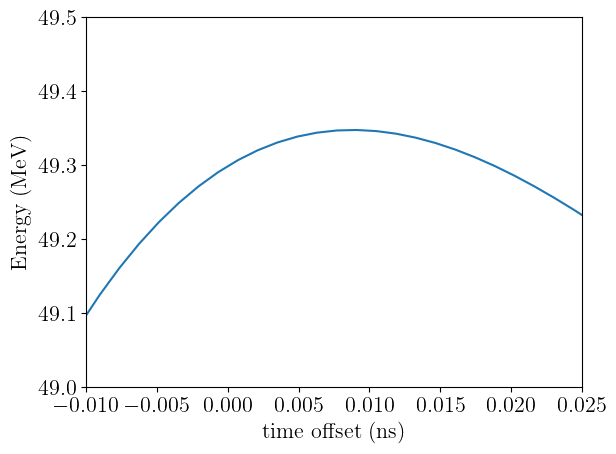

[-0.029934000000000002, -0.02854018604651163, -0.027146372093023258, -0.025752558139534885, -0.024358744186046517, -0.02296493023255814, -0.02157111627906977, -0.0201773023255814, -0.018783488372093027, -0.017389674418604652, -0.015995860465116283, -0.014602046511627909, -0.013208232558139537, -0.011814418604651166, -0.010420604651162792, -0.009026790697674423, -0.007632976744186049, -0.006239162790697676, -0.004845348837209306, -0.003451534883720933, -0.0020577209302325627, -0.0006639069767441863, 0.0007299069767441838, 0.0021237209302325537, 0.0035175348837209303, 0.0049113488372093, 0.00630516279069767, 0.007698976744186041, 0.009092790697674416, 0.010486604651162787, 0.011880418604651157, 0.013274232558139533, 0.014668046511627904, 0.016061860465116273, 0.01745567441860465, 0.01884948837209302, 0.02024330232558139, 0.021637116279069765, 0.023030930232558137, 0.024424744186046506, 0.025818558139534875, 0.027212372093023254, 0.02860618604651163, 0.03]
49.34756002020266 [48.0417472916

In [6]:
plt.plot(offsetns,allenergies)
plt.xlabel('time offset (ns)')
plt.ylabel('Energy (MeV)')
plt.xlim([-.01,.025])
plt.ylim([49,49.5])
plt.show()

center = 28
low = 17
high = 39

print(offsetns)
print(max(allenergies),allenergies)
print('center energy and offset: ',allenergies[center],offsetns[center])
print('goal difference: ',.009534953186778054*1e9/(cms))
print('lower goal: ',offsetns[center]-.009534953186778054*1e9/(2*cms))
print('upper goal: ',offsetns[center]+.009534953186778054*1e9/(cms*2))
print('found lower and upper: ',offsetns[low],offsetns[high])
print('difference between found: ',offsetns[high]-offsetns[low])
print('energies of lower and upper: ',allenergies[low],allenergies[high])

A:  7932.580155145769
B:  -773.4745850661627
C:  11.703740795452479
D:  49.29924457640845
time offset witness (ns):  0.0022896226489506305
time offset drive (ns):  -0.018
dist offset:  0.00608267584582138
desired dist offset:  0.00608267584582138
witness energy:  49.322082100183735
drive energy:  48.79170866906406


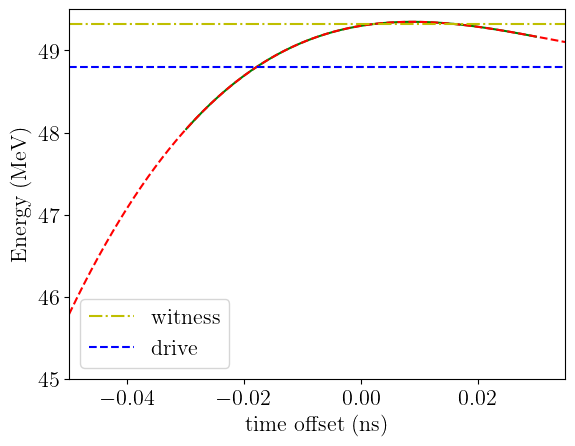

In [7]:
def curve2(x,A,B,C,D):
    return A*x**3 + B*x**2 + C*x + D

popt, pcov = curve_fit(curve2, offsetns, allenergies) 
print('A: ',popt[0])
print('B: ',popt[1])
print('C: ',popt[2])
print('D: ',popt[3])

# pairs of numbers that are 
sep = 2.028962264895063e-11
ts1 = -0.018e-9
ts0 = ts1+sep

#ts0 = 0.001608016*1e-9
#ts1 = ts0 - sep # -.026

print('time offset witness (ns): ',ts0*1e9)
print('time offset drive (ns): ',ts1*1e9)
print('dist offset: ',(ts0-ts1)*cms)
print('desired dist offset: ',sep*cms)

denergy = curve2(ts0*1e9,popt[0],popt[1],popt[2],popt[3])
wenergy = curve2(ts1*1e9,popt[0],popt[1],popt[2],popt[3])

print('witness energy: ',denergy)
print('drive energy: ',wenergy)

xss = np.arange(-.055,.035,0.00001)



plt.plot(offsetns,allenergies,'g')
plt.plot(xss,curve2(xss,popt[0],popt[1],popt[2],popt[3]),'r--')
plt.axhline(y=denergy, color='y', linestyle='dashdot',label='witness')
plt.axhline(y=wenergy, color='b', linestyle='--',label='drive')
plt.xlabel('time offset (ns)')
plt.ylabel('Energy (MeV)')
plt.legend()
plt.xlim([-.05,.035])
plt.ylim([45,49.5])
plt.show()

C:  2.3235273010411417
D:  6.029160823480153


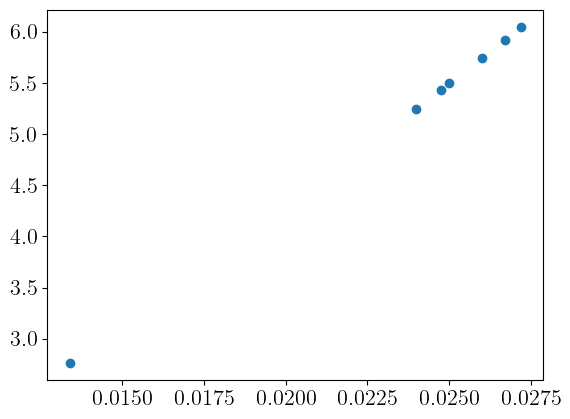

In [8]:
code = [.0272,.0267,.026,.025,.02475,.024,.0134]
opal = [6.04725,5.92066,5.7444,5.4946,5.4325,5.2471,2.7653]
ele = [6.09347,6.09185,6.089672,6.086633,6.0858,6.08415,6.060696]


def line(x,C,D):
    return C*x + D

popt, pcov = curve_fit(line, code, ele) 
#print('A: ',popt[0])
#print('B: ',popt[1])
print('C: ',popt[0])
print('D: ',popt[1])

codes = np.arange(.01,.03,.0001)

plt.scatter(code,opal)
#plt.scatter(code,ele)
#plt.plot(codes,line(codes,popt[0],popt[1]))
#plt.axhline(y=6.0525, color='y', linestyle='dashdot',label='witness')
#plt.xlim([.01,.015])
#plt.ylim([6.04,6.06])
plt.show()

[-2.30000000e-11 -2.26666667e-11 -2.23333333e-11 -2.20000000e-11
 -2.16666667e-11 -2.13333333e-11 -2.10000000e-11]
C:  -4.094795947002756e-12
D:  4.248215942418802e-12
for wanted separation  5.19  sep to aim for is  -1.7003775022525502e-11


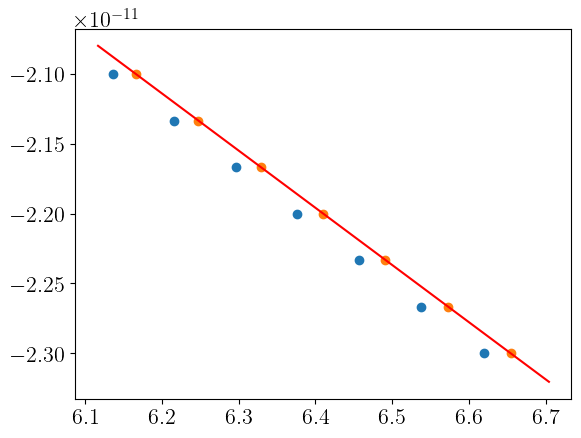

In [2]:
code = [3.35e-11,3.5e-11,3.65e-11,3.68e-11,3.7e-11,3.728e-11,3.7275e-11,3.71e-11,3.705e-11,3.707e-11,3.7085e-11,3.709e-11,3.715e-11,3.8e-11,3.72e-11,]
resu = [5.477221330066229,5.7025075581851326,5.925462947715232,5.96944683657874,5.998722603687057,6.0395504644397136,6.038796573248462,6.013346412704124,6.005799383787647,6.008812647539941,6.011177096526765,6.0122156520350245,6.018047850504971,6.146964236846131,6.028435443774072]

code = np.linspace(-0.023e-9,-0.021e-9,7)
print(code)
resu = [6.619394961631997,6.5381819523455675,6.457225381767628,6.376525121947196,6.296081009933729,6.215892910770293,6.135960693356424]
eler = [6.6550955998039285,6.572899844023539,6.490929613647722,6.409612122251218,6.3286217467179995,6.247369621281251,6.166452564634994]

def line(x,C,D):
    return C*x + D

popt, pcov = curve_fit(line, eler, code) 
#print('A: ',popt[0])
#print('B: ',popt[1])
print('C: ',popt[0])
print('D: ',popt[1])

dsep = 5.19 #5.617916979781891         #5.825987979033073
print('for wanted separation ',dsep,' sep to aim for is ',line(dsep,popt[0],popt[1]))

xxss = np.arange(eler[-1]-.05,eler[0]+.05,0.001)

plt.scatter(resu,code)
plt.scatter(eler,code)
plt.plot(xxss,line(xxss,popt[0],popt[1]),'r')
#plt.xlim([5.4,6.1])
#plt.ylim([3e-11,4e-11])
#plt.xlim([
plt.show()



[6.000e-12 6.025e-12 6.050e-12 6.075e-12 6.100e-12 6.125e-12 6.150e-12
 6.175e-12 6.200e-12]
C:  6.278371053850815e-12
D:  -6.854793789116233e-11
for wanted separation  5.1  sep to aim for is  5.630966776132388e-12
0.03321677009715529
for wanted separation at end of opal  5.066783229902844  sep to aim for is  1.6407541678723658e-12


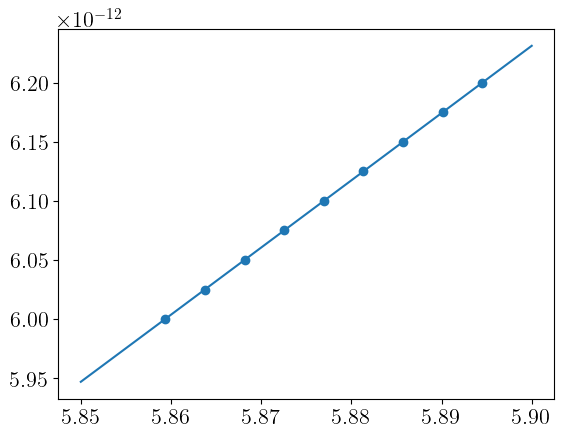

In [3]:
code = np.linspace(0.006e-9,0.0062e-9,9)
print(code)
#code2 = [6.200e-12,6.225e-12,6.250e-12,6.275e-12, 6.300e-12, 6.321993744832008e-12, 6.325e-12, 6.350e-12, 6.375e-12, 6.400e-12]
resu = [5.859351786595468,5.863753245781922,5.868153171997292,5.8725515641118164,5.876948423084727,
       5.881343746661827,5.885737542360658,5.890129803361788,5.89452052783912]
eler = [5.892258149927443,5.896913369561219,5.901573549326855,5.905530431597583,5.910656799482439,
       5.914386889227075,5.9189613590362455,5.923758824060599,5.927401370449559]


def line(x,B,C,D):
    return B*x**2 + C*x + D

popt, pcov = curve_fit(line, eler, code) 
print('C: ',popt[0])
print('D: ',popt[1])

dsep = 5.1 #5.914169012097435 #5.617916979781891         5.825987979033073
print('for wanted separation ',dsep,' sep to aim for is ',line(dsep,popt[0],popt[1],popt[2]))


diffs = [eler[i]-resu[i] for i in np.arange(len(eler))]
avgdif = np.mean(diffs)
print(avgdif)

pop, pco = curve_fit(line, resu, code)
dsp = dsep - avgdif

print('for wanted separation at end of opal ',dsp,' sep to aim for is ',line(dsp,pop[0],pop[1],pop[2]))




xxxss = np.arange(5.885,5.94,.01)
ys = np.arange(5.85,5.9,.01)
plt.scatter(resu,code)
#plt.scatter(eler,code)
#plt.plot(xxxss,line(xxxss,popt[0],popt[1],popt[2]))
plt.plot(ys, line(ys,pop[0],pop[1],pop[2]))
#plt.scatter([5.914169012097435],[6.3226997122546015e-12])

plt.show()


In [9]:
print(offsetns[55]-offsetns[54])
print(0.06/.009534953186778054*7)
print(.059934/44*7)
print(.059934-.03)
print(0.2/.008860061963458032*7)
print(.2/158)

IndexError: list index out of range

In [ ]:
print(1.5*4.035)

In [10]:
# pairs of numbers that are 
sep = .009534953186778054/(cms)
ts0 = -0.0068097994648473725*1e-9
ts1 = ts0 + sep

print('time offset witness (ns): ',ts0*1e9)
print('time offset drive (ns): ',ts1*1e9)
print('dist offset: ',(ts1-ts0)*cms)
print('desired dist offset: ',sep*cms)

print('witness energy: ',curve2(ts0,popt[0],popt[1],popt[2],popt[3]))
print('drive energy: ',curve2(ts1,popt[0],popt[1],popt[2],popt[3]))

time offset witness (ns):  -0.0068097994648473725
time offset drive (ns):  0.024995380860196207
dist offset:  0.009534953186778054
desired dist offset:  0.009534953186778054
witness energy:  49.299244576328746
drive energy:  49.299244576700985
